# Optimizador momentum

El optimizador de descenso por gradiente con momento es una variante del descenso por gradiente tradicional que ayuda a acelerar el entrenamiento de modelos, especialmente en superficies de error que son muy poco profundas o con curvaturas irregulares. La idea es tomar en cuenta los gradientes anteriores para determinar la dirección de la actualización en cada paso, lo que permite al método "acumular velocidad" en direcciones consistentes y suavizar las actualizaciones en direcciones variables.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import nni


In [15]:
f = nni.beale_function
df_dx = nni.beale_gradient_x
df_dy = nni.beale_gradient_y

# Search space
min_x = -4.5
max_x = 4.5
min_y = -4.5
max_y = 4.5

x = np.linspace(min_x, max_x, 100)
y = np.linspace(min_y, max_y, 100)

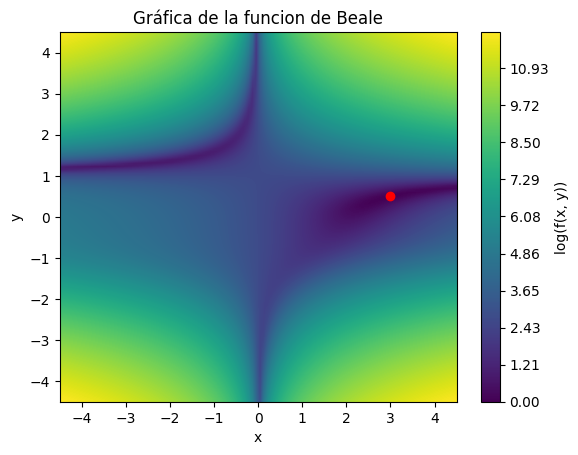

In [16]:
# Create a meshgrid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values using the function f
Z = f(X, Y)
# Applying a logarithmic transformation to Z values
Z_log = np.log(Z + 1)  # Adding 1 to avoid taking log of zero

# Create a 2D plot of the function
plt.contourf(X, Y, Z_log, levels=1000, cmap='viridis')
plt.plot(3, 0.5, 'ro')
plt.colorbar().set_label('log(f(x, y))')
#plt.colorbar()

# Add labels and title to the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de la funcion de Beale')


# Show the plot
plt.show()

In [17]:
class MomentumOptimizer(nni.GradientDescentOptimizer):
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6, beta=0.9):
        super().__init__(learning_rate=learning_rate, max_iterations=max_iterations, tolerance=tolerance)
        self.beta = beta

    def next_params(self, gradient, params):
        if not hasattr(self, 'momentum'):
            self.momentum = [0] * len(params)
        self.momentum = [self.beta * m + (1 - self.beta) * grad for m, grad in zip(self.momentum, gradient)]
        return [param - self.learning_rate * mom for param, mom in zip(params, self.momentum)]

In [18]:
# -- hyperparameters --
# Initial guess
initial_params = [-1, -1.0]
# Learning rate
learning_rate = 0.01
# Maximum number of iterations
max_iterations = 300

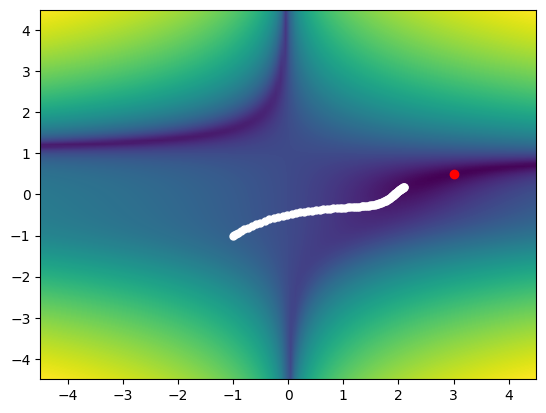

In [22]:
optimizer = MomentumOptimizer(learning_rate=0.005, max_iterations=100, tolerance=1e-6)

# Optimize the function
optimized_params = optimizer.optimize(f, lambda x, y: [df_dx(x, y), df_dy(x, y)], initial_params)

# Extract the x and y values from the history variable
history = optimizer.get_history()
x_values = [log['params'][0] for log in history]
y_values = [log['params'][1] for log in history]

# Create a 2D plot of the function
plt.contourf(X, Y, Z_log, levels=1000, cmap='viridis')
plt.plot(3, 0.5, 'ro')
plt.plot(x_values, y_values, 'w.', markersize=10)
plt.show()